# Lab Exam 1B

In [54]:
from commonfunctions import *
from BassemFunctions import *
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import all modules from LabsMethods folder
from LabsMethods.Morph import *
from LabsMethods.ContrastEnhancement import *
from LabsMethods.EdgeDetection import *
from LabsMethods.Segmentation import *
from LabsMethods.Segmentation2 import *
from LabsMethods.Smoothing import *
from HelperForQuestion.HistogramQuestions import *
from HelperForQuestion.MaskQuestions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Question 1


which issue should i solve first ?? and why

You should solve the Gaussian noise issue first before applying contrast enhancement. Here's why:

Noise Removal: Gaussian noise can obscure important details in the image. Removing noise first ensures that the subsequent contrast enhancement is applied to a cleaner image, which can improve the effectiveness of the contrast enhancement.

Contrast Enhancement: Enhancing contrast on a noisy image can amplify the noise, making it more prominent and potentially degrading the image quality. By removing the noise first, you ensure that the contrast enhancement improves the visibility of actual image features rather than the noise.

In [55]:
''' Question 1'''

# Read the image and load section
img_rgb = preprocess_image('Q1.png', 'rgb')

# Solving Issues section

# ISSUES #1 -> Noise (Grainy Texture)

    #Method -> Smoothing applying gaussian filter
# img_after_noise_removal1 = gaussian_filter(img_rgb, 5)

    #Method -> Smoothing applying median filter
img_after_median_filter= median_filter(img_rgb, 7)


# ISSUES #2 -> Contrast Enhancement 
    
        #Method -> Contrast Enhancement using histogram equalization
# img_after_contrast_enhancement1 = histogram_equalization(img_after_median_filter)
# # Show single histogram
# show_histogram(img_after_contrast_enhancement1, "Original Image")

        #Method -> Contrast Enhancement using Contrast limited adpatative histogram equalization CLAHE
#img_after_contrast_enhancement2 = clahe(img_after_median_filter)


# ISSUES #3 -> Overexposure (Excessive Brightness)  Adjust Brightness or exposure Color Cast
# Fix yellow tint and sharpen
def reduce_blue(image, factor=0.8):
    
    return  


img_after_median_filter[:, :, 2] = getImageWithHist(img_after_median_filter[:, :, 2])
img_after_median_filter[:, :, 1] = getImageWithHist(img_after_median_filter[:, :, 1])

img_fixed = getImageWithHist_color(img_after_median_filter, color='yellow')
# ISSUES #4 -> Sharpening for better details 

def gentle_sharpen_fast(image, radius=1.5, amount=0.5, threshold=5):
    """
    Fast gentle sharpening that preserves image quality.
    
    Args:
        image: Input image
        radius: Gaussian blur radius
        amount: Sharpening strength (0.3-0.7 recommended)
        threshold: Edge detection threshold
    """
    if is_rgb(image):
        # Process all channels at once using cv2
        # Convert to float32 for processing
        img_float = image.astype(np.float32)
        
        # Fast Gaussian blur using cv2
        blurred = cv2.GaussianBlur(img_float, (0, 0), radius)
        
        # Calculate unsharp mask
        mask = img_float - blurred
        
        # Fast edge detection using cv2
        edges = cv2.Sobel(img_float, cv2.CV_32F, 1, 1)
        edge_mask = np.sum(np.abs(edges), axis=2) > threshold
        
        # Broadcast edge mask to all channels
        edge_mask = np.repeat(edge_mask[:,:,np.newaxis], 3, axis=2)
        
        # Apply edge-aware sharpening
        mask = np.where(edge_mask, mask * 0.3, mask * amount)
        
        # Add mask to original image
        sharpened = img_float + mask
        
        return np.clip(sharpened, 0, 255).astype(np.uint8)
    
    # Grayscale processing
    img_float = image.astype(np.float32)
    blurred = cv2.GaussianBlur(img_float, (0, 0), radius)
    mask = img_float - blurred
    
    edges = np.abs(cv2.Sobel(img_float, cv2.CV_32F, 1, 1)) > threshold
    mask = np.where(edges, mask * 0.3, mask * amount)
    
    sharpened = img_float + mask
    return np.clip(sharpened, 0, 255).astype(np.uint8)
# Update your code to:
img_sharpened = gentle_sharpen_fast(img_fixed, 
                              radius=1,  # Gentler blur
                              amount=5,   # Subtle sharpening
                              threshold=5) # Edge preservation


# show images and outputs section
show_images([img_rgb,img_after_median_filter,img_fixed], ['original','img_after_median_filter','after contrast enhancement'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

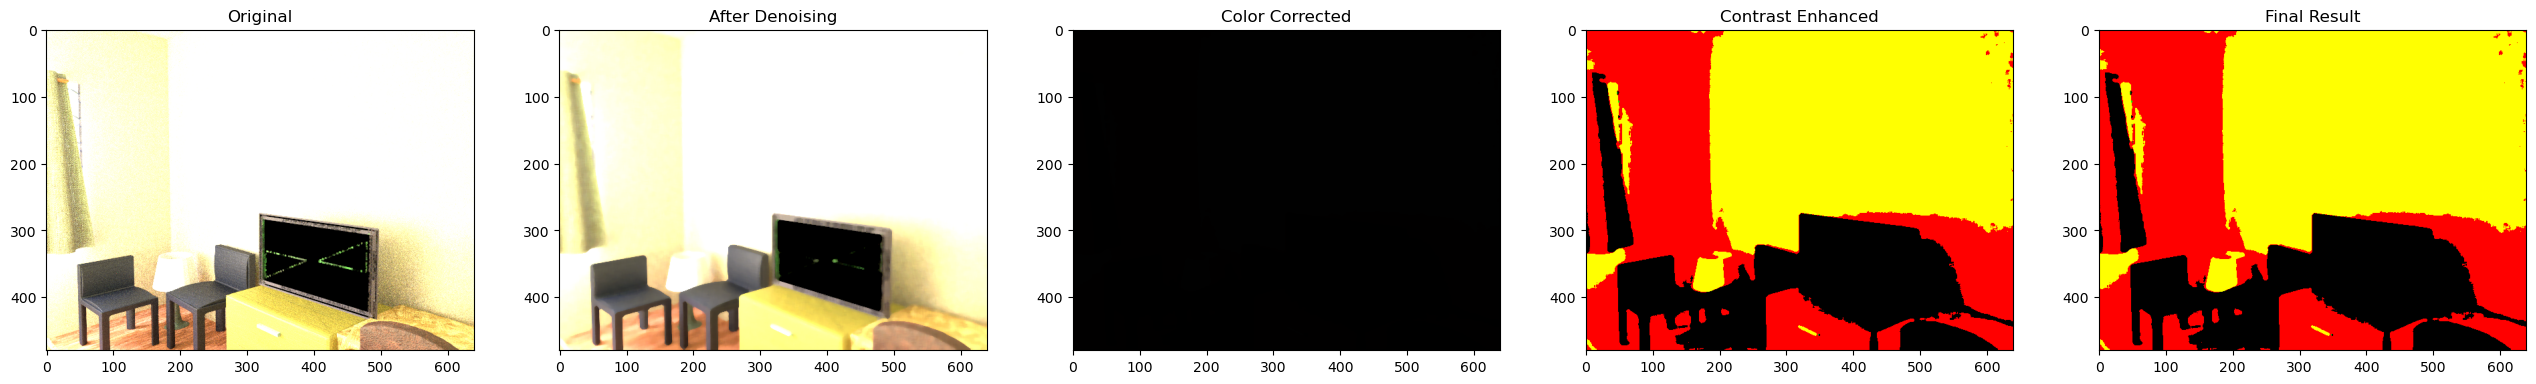

In [ ]:
# ISSUES #1 -> Remove noise first
img_after_median_filter = median_filter(img_rgb, 7)

# ISSUES #2 -> Fix color cast using HSV adjustment
img_color_fixed = adjust_hsv(img_after_median_filter, 
                           hue_shift=-5,  # Reduce yellow
                           sat_scale=0.9)  # Slightly reduce saturation

# ISSUES #3 -> Apply contrast enhancement
# Use getImageWithHist_color instead of individual channel processing
img_contrast_fixed = getImageWithHist_color(img_color_fixed, color='yellow')

# ISSUES #4 -> Apply gentle sharpening last
img_final = gentle_sharpen_fast(img_contrast_fixed, 
                              radius=1.5,
                              amount=0.4,
                              threshold=10)

# Show results
show_images([img_rgb, 
            img_after_median_filter,
            img_color_fixed,
            img_contrast_fixed,
            img_final], 
            ['Original',
             'After Denoising',
             'Color Corrected',
             'Contrast Enhanced',
             'Final Result'])

### Question 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


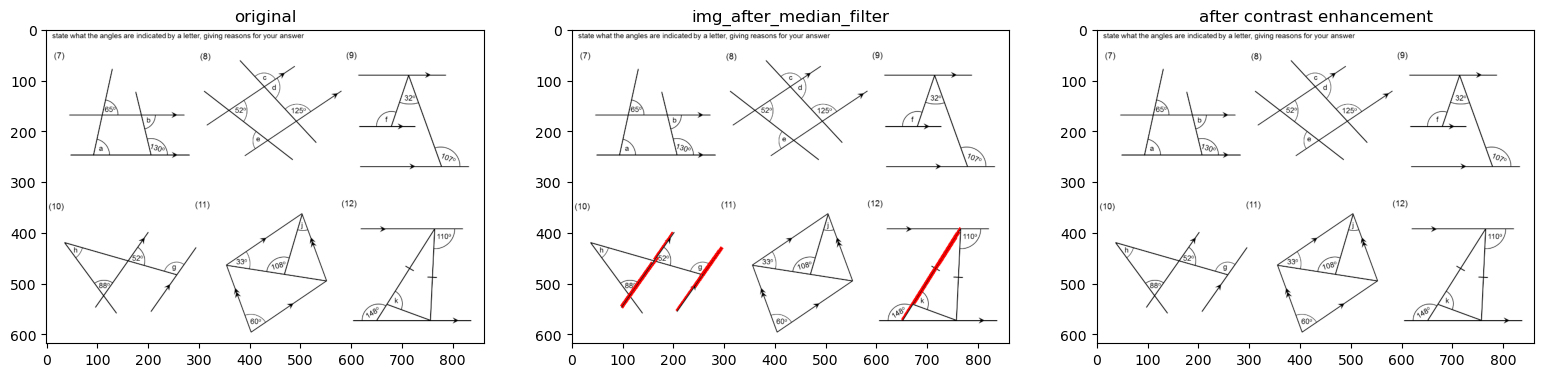

In [ ]:
''' Question 1'''

# Read the image and load section
img_rgb = preprocess_image('Q2.png', 'rgb')

# Solving Issues section

img_rgb1 =detect_and_highlight_lines_skimage(img_rgb)

# show images and outputs section
show_images([img_rgb,img_rgb1,img_rgb], ['original','img_after_median_filter','after contrast enhancement'])

### Question 3

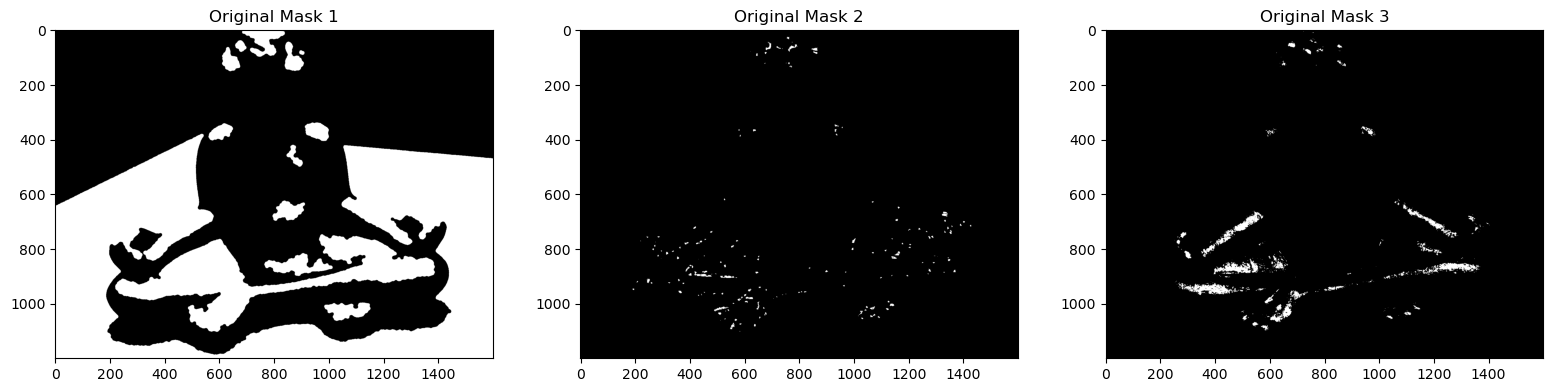

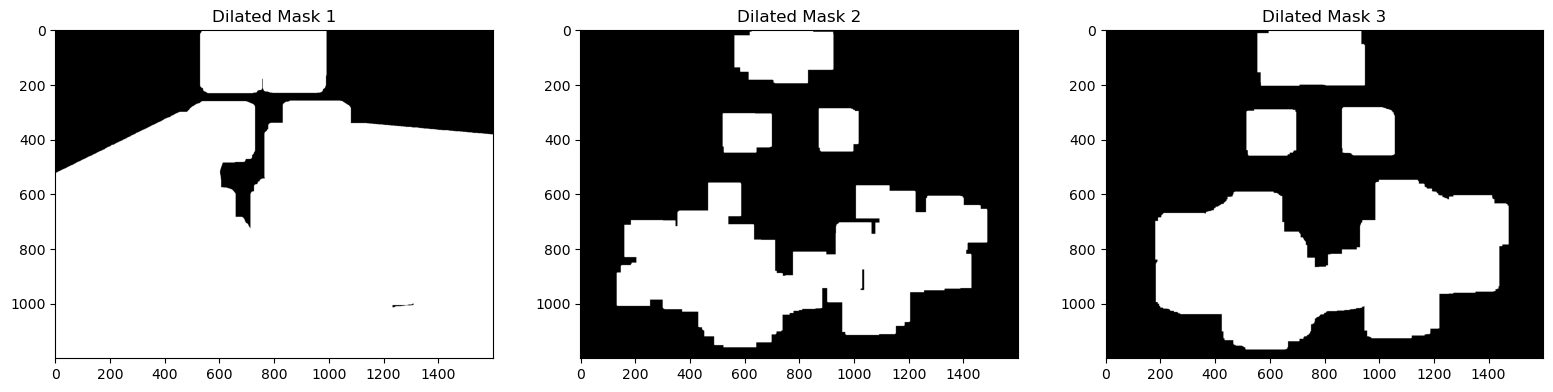

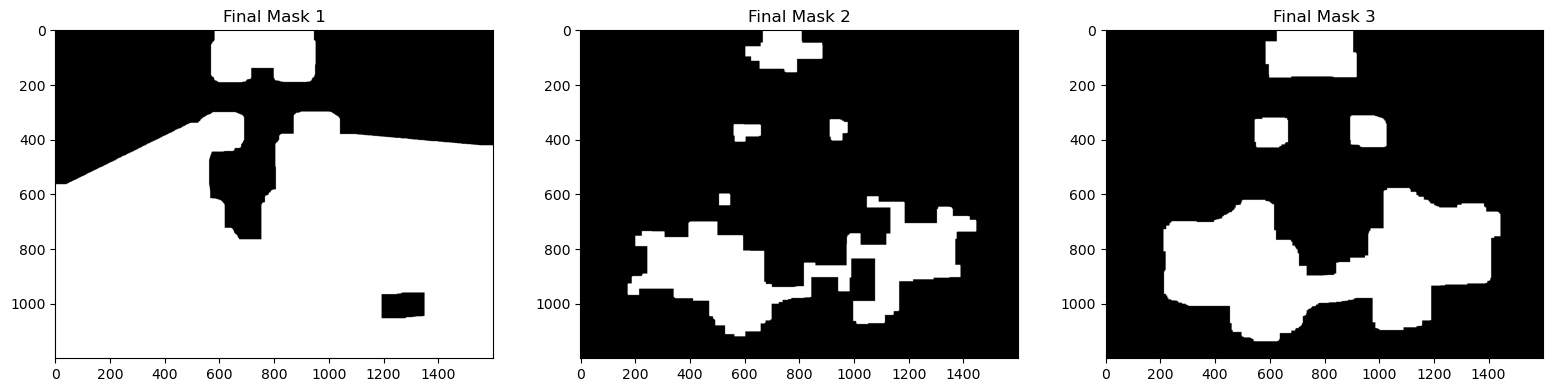

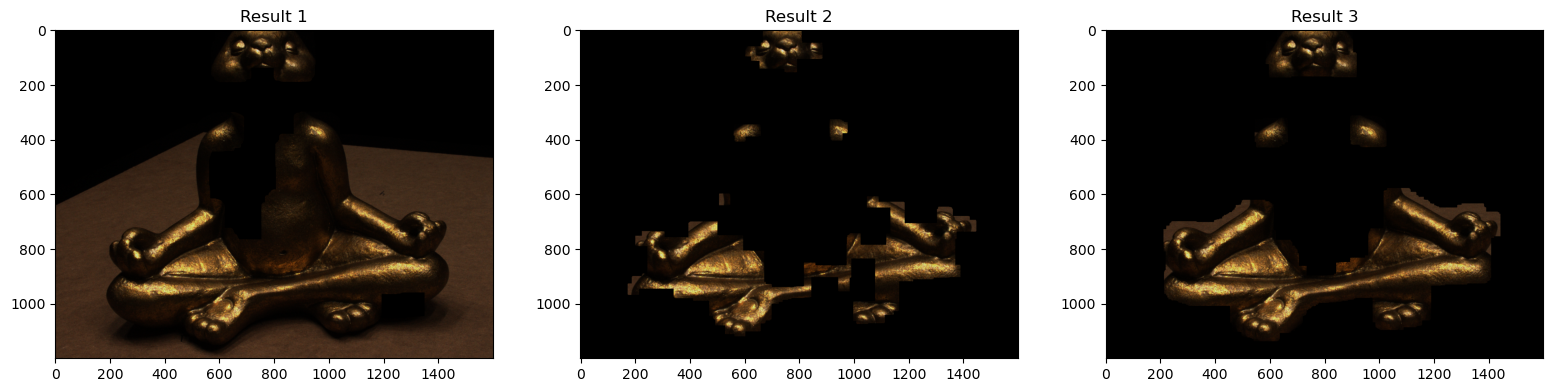

In [59]:
# Read images
img = preprocess_image('Q3.png', 'rgb')

# Get masks using all approaches
mask1 = get_minimal_mask_approach1(img)
mask2 = get_minimal_mask_approach2(img)
mask3 = threshold_bright_regions(img, threshold=180)

# Process mask1
dilated_mask1 = apply_dilation(mask1, kernel_size=5, iterations=40)
final_mask1 = apply_erosion(dilated_mask1, kernel_size=5, iterations=20)
result1 = apply_mask(img, final_mask1)

# Process mask2
dilated_mask2 = apply_dilation(mask2, kernel_size=5, iterations=29)
final_mask2 = apply_erosion(dilated_mask2, kernel_size=5, iterations=20)
result2 = apply_mask(img, final_mask2)

# Process mask3
dilated_mask3 = apply_dilation(mask3, kernel_size=5, iterations=35)
final_mask3 = apply_erosion(dilated_mask3, kernel_size=5, iterations=15)
result3 = apply_mask(img, final_mask3)

# Show all results
# First row: Original masks
show_images([mask1, mask2, mask3], 
           ['Original Mask 1', 'Original Mask 2', 'Original Mask 3'])

# Second row: After dilation
show_images([dilated_mask1, dilated_mask2, dilated_mask3],
           ['Dilated Mask 1', 'Dilated Mask 2', 'Dilated Mask 3'])

# Third row: After erosion
show_images([final_mask1, final_mask2, final_mask3],
           ['Final Mask 1', 'Final Mask 2', 'Final Mask 3'])

# Fourth row: Final results
show_images([result1, result2, result3],
           ['Result 1', 'Result 2', 'Result 3'])

### Question 4

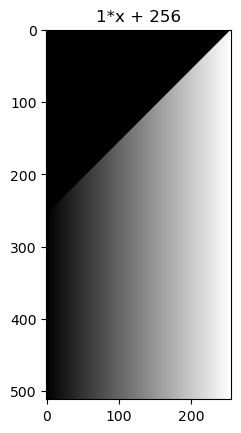

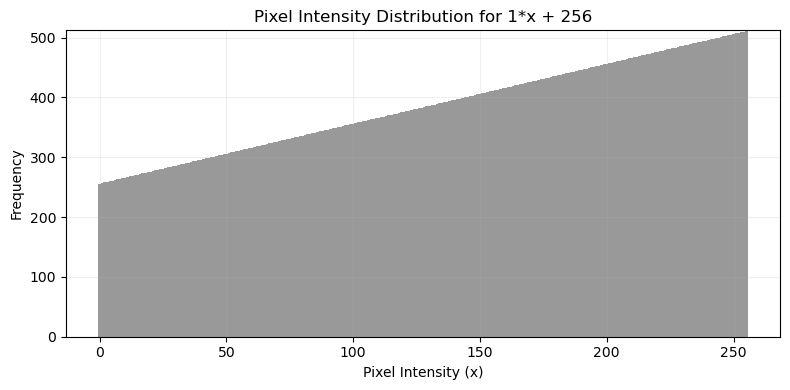

In [ ]:


# Test with correct linear equation
# y = mx + b
# For (0,256) to (255,512):
# m = (512-256)/255 = 1
# b = 256
hist_values = create_histogram_from_equation('1*x + 256')
img_linear = generate_image_from_histogram(hist_values, width=256, height=512)
show_images([img_linear], ['1*x + 256'])
display_histogram(hist_values, '1*x + 256', y_max=512)
# # 2. Quadratic equation: y = 0.01x²
# # - Shows increasing rate of change
# # - Small coefficient prevents overflow
# hist_values = create_histogram_from_equation('0.01*x**2')
# img_quad = generate_image_from_histogram(hist_values)
# display_histogram_and_image(img_quad, hist_values, '0.01*x**2', y_max=800)

# # 3. Sinusoidal: y = 200*sin(x/30) + 300
# # - Period of 30 pixels
# # - Amplitude of 200
# # - Offset by 300 to keep values positive
# hist_values = create_histogram_from_equation('200*sin(x/30) + 300')
# img_sine = generate_image_from_histogram(hist_values)
# display_histogram_and_image(img_sine, hist_values, '200*sin(x/30) + 300', y_max=600)

# # 4. Exponential decay: y = 500*exp(-x/100)
# # - Starting value of 500
# # - Decay rate of 1/100
# hist_values = create_histogram_from_equation('500*exp(-x/100)')
# img_exp = generate_image_from_histogram(hist_values)
# display_histogram_and_image(img_exp, hist_values, '500*exp(-x/100)', y_max=600)